# PDF and CDF w/ Carbon Tax

In [19]:
import pandas as pd

# Load data from your Excel file and specific sheet
file_path = '/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Transporting_Hydrogen_Via_Hydrogen/No_Double_Counting_Final_MCTransDistModels_Hydrogen.xlsm'  # Replace with your actual file path
sheet_name_100_km = 'Base Case 100 km'  # Replace with your sheet name
sheet_name_250_km = 'Base Case 250 km'  # Replace with your sheet name
df_100_km = pd.read_excel(file_path, sheet_name=sheet_name_100_km, usecols='E:N', skiprows=18, nrows=36)
df_250_km = pd.read_excel(file_path, sheet_name=sheet_name_250_km, usecols='E:N', skiprows=18, nrows=36)

# Filter columns as needed and drop unnamed columns
df_100_km = df_100_km.loc[:, ~df_100_km.columns.str.contains('Unnamed', na=False)]
df_250_km = df_250_km.loc[:, ~df_250_km.columns.str.contains('Unnamed', na=False)]

# Create dictionaries for each demand level
low_demand_values_100_km = {}
medium_demand_values_100_km = {}
high_demand_values_100_km = {}

low_demand_values_250_km = {}
medium_demand_values_250_km = {}
high_demand_values_250_km = {}

# Map delivery types to standardized names (e.g., matching the names in your provided picture)
delivery_type_map = {
    'Gas': 'Gas Trucks',
    'Liquid': 'Liquid Trucks',
    'Pipe': 'Pipelines'
}

# Iterate over the DataFrame to build dictionaries
for _, row in df_100_km.iterrows():
    city = row['City Name']
    demand = row['Demand Level']
    delivery_type = row['Delivery Mode']
    total_cost = row['Total Cost']

    # Map the delivery type to standardized names
    delivery_type = delivery_type_map.get(delivery_type, delivery_type)

    # Format the key as "City Delivery_Type"
    key = f"{city} {delivery_type}"

    # Append to the respective dictionary based on demand level
    if demand == 'Low':
        low_demand_values_100_km[key] = total_cost
    elif demand == 'Medium':
        medium_demand_values_100_km[key] = total_cost
    elif demand == 'High':
        high_demand_values_100_km[key] = total_cost

# Iterate over the DataFrame to build dictionaries
for _, row in df_250_km.iterrows():
    city = row['City Name']
    demand = row['Demand Level']
    delivery_type = row['Delivery Mode']
    total_cost = row['Total Cost']

    # Map the delivery type to standardized names
    delivery_type = delivery_type_map.get(delivery_type, delivery_type)

    # Format the key as "City Delivery_Type"
    key = f"{city} {delivery_type}"

    # Append to the respective dictionary based on demand level
    if demand == 'Low':
        low_demand_values_250_km[key] = total_cost
    elif demand == 'Medium':
        medium_demand_values_250_km[key] = total_cost
    elif demand == 'High':
        high_demand_values_250_km[key] = total_cost


# Print the dictionaries
print("Low Demand Base Case Values 100 km:")
print(low_demand_values_100_km)

print("\nMedium Demand Base Case Values 100 km:")
print(medium_demand_values_100_km)

print("\nHigh Demand Base Case Values 100 km:")
print(high_demand_values_100_km)

# Print the dictionaries
print("Low Demand Base Case Values 250 km:")
print(low_demand_values_250_km)

print("\nMedium Demand Base Case Values 250 km:")
print(medium_demand_values_250_km)

print("\nHigh Demand Base Case Values 250 km:")
print(high_demand_values_250_km)


Low Demand Base Case Values 100 km:
{'New Haven Gas Trucks': 3.816962123321067, 'New Haven Liquid Trucks': 4.398560978263469, 'New Haven Pipelines': 35.50928451085382, 'Fresno Gas Trucks': 3.8209539681850027, 'Fresno Liquid Trucks': 4.401134541255118, 'Fresno Pipelines': 32.27346250010088, 'Atlanta Gas Trucks': 3.7592918898647505, 'Atlanta Liquid Trucks': 4.029770120561619, 'Atlanta Pipelines': 14.166732738265415, 'Miami Gas Trucks': 3.598280717194972, 'Miami Liquid Trucks': 4.042551674272073, 'Miami Pipelines': 11.234945494422146}

Medium Demand Base Case Values 100 km:
{'New Haven Gas Trucks': 3.359282427048798, 'New Haven Liquid Trucks': 3.7484546128812894, 'New Haven Pipelines': 6.948439883381557, 'Fresno Gas Trucks': 3.2999163976827783, 'Fresno Liquid Trucks': 3.7514281758729373, 'Fresno Pipelines': 6.236387278712851, 'Atlanta Gas Trucks': 3.6362459346288865, 'Atlanta Liquid Trucks': 3.1744637551794392, 'Atlanta Pipelines': 4.934754357718571, 'Miami Gas Trucks': 3.477213401652596,

## Low Demand

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

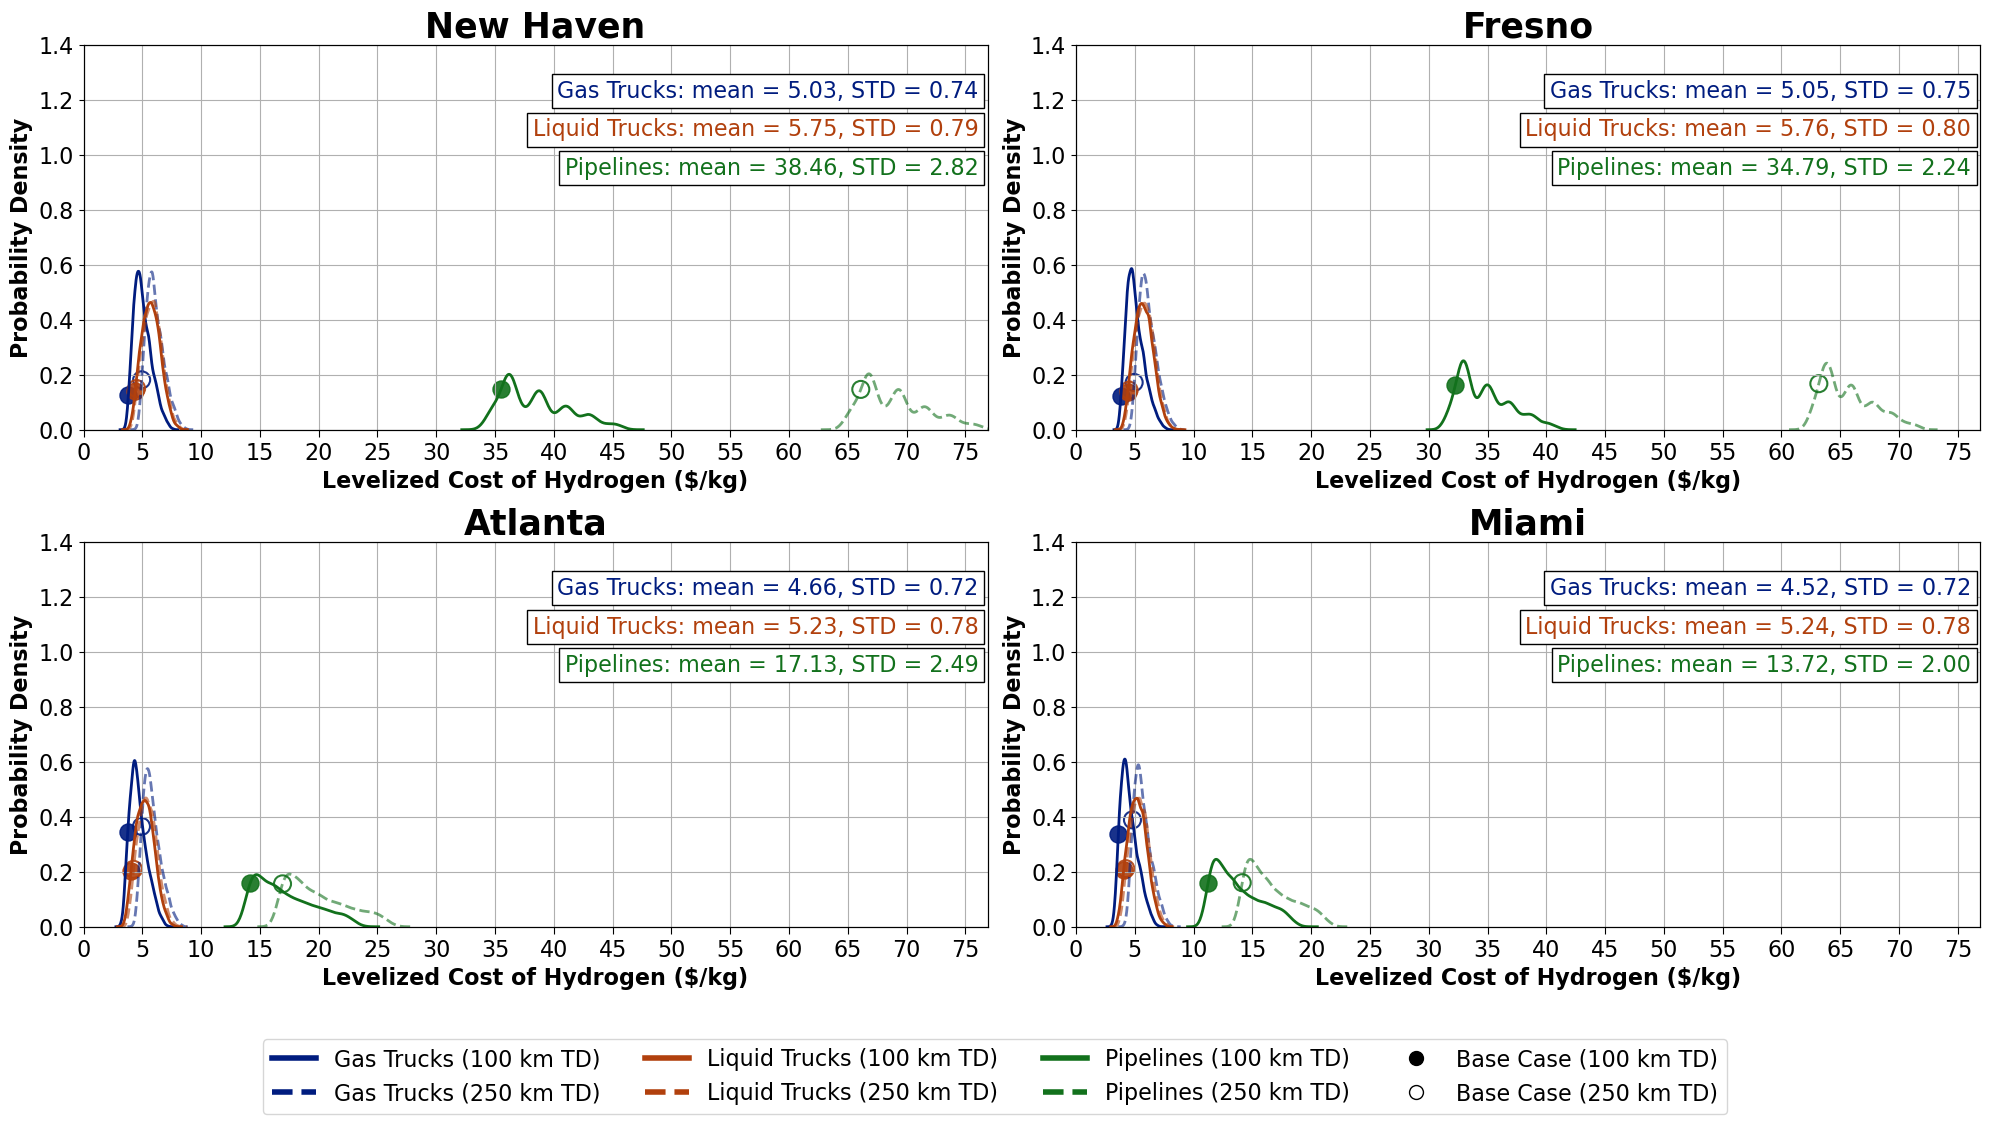

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

# Path to your CSV file
csv_file_path_100 = 'Costs with Carbon Tax Data/Distribution Paper - Low Demand w_ CT 100.csv'  # Replace with your actual file path
csv_file_path_250 = 'Costs with Carbon Tax Data/Distribution Paper - Low Demand w_ CT 250.csv'

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df_100 = pd.read_csv(csv_file_path_100, skiprows=1)
df_100 = df_100.loc[:, ~df_100.columns.str.contains('^Unnamed')]  # Dropping 'Unnamed' columns
df_250 = pd.read_csv(csv_file_path_250, skiprows=1)
df_250 = df_250.loc[:, ~df_250.columns.str.contains('^Unnamed')]

# Assigning new column names
df_100.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]
df_250.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values_100 = low_demand_values_100_km
base_case_values_250 = low_demand_values_250_km

import seaborn as sns

# Use the same color palette from the market penetration plot
palette = sns.color_palette("dark", n_colors=3)

color_map = {
    "Gas Trucks": palette[0],    # Dark blue (Gas Trucks)
    "Liquid Trucks": palette[1],  # Saturated orange (Liquid Trucks)
    "Pipelines": palette[2]       # Bold green (Pipelines)
}

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Define consistent x-axis limits and ticks
x_limits = (0, np.max(df_250['New Haven Pipelines']))
x_ticks = np.arange(0, np.max(df_250['New Haven Pipelines']), 5)  # x-ticks from 0 to 35 in increments of 5

# Create figure and subplots for each city
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 1 column, 4 rows for each city
# Correct flattening of axs if it’s a 2D array
axs = axs.flatten() if axs.ndim == 2 else axs

for i, city in enumerate(cities):
    ax = axs[i]
    ax.set_title(f'{city}', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 1.4)  # Set y-limits for histogram proportions
    ax.set_xlim(x_limits)  # Set consistent x-limits for each subplot

    # Set x-tick positions and labels explicitly for each subplot
    ax.set_xticks(x_ticks)  # Set x-tick positions
    ax.set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)  # Set x-tick labels
    ax.tick_params(axis='y', which='both', labelsize=16)  # Set label size for y-axis
    ax.tick_params(axis='x', which='both', length=5)  # Set tick length for x-axis

    # Create a secondary y-axis for boxplots without ticks on the right
    ax_box = ax.twinx()
    ax_box.set_ylim(-0.05, 0.05)  # Separate y-limits for boxplots above histograms
    ax_box.set_yticks([])  # Hide y-ticks for boxplot axis
    ax_box.set_xlim(x_limits)  # Ensure consistent x-limits on boxplot axis

    # Prepare a list to collect mean and std information for legend text
    method_stats = []

    # Plot each method (Gas Trucks, Liquid Trucks, Pipelines) for the current city
    for method in methods:
        column_name = f"{city} {method}"
        
        data_100 = df_100[column_name].dropna().values
        base_case_100 = base_case_values_100.get(column_name)
        data_250 = df_250[column_name].dropna().values
        base_case_250 = base_case_values_250.get(column_name)
        
        color = color_map[method]

        # Plot KDE using seaborn
        sns.kdeplot(data_100, ax=ax, color=color, fill=False, alpha=1, linewidth=2)
        sns.kdeplot(data_250, ax=ax, color=color, linestyle = '--', fill=False, alpha=0.6, linewidth=2)

        # Generate the KDE function using scipy
        kde_100 = gaussian_kde(data_100)
        kde_250 = gaussian_kde(data_250)
    
        # Evaluate the KDE at the base case to get the y-value
        if base_case_100 is not None:
            y_value_100 = kde_100(base_case_100)[0]  # Get the density at the base case

            # Plot the base case as a dot on the KDE curve
            ax.scatter(base_case_100, y_value_100, color=color, s=150, linewidth=1, alpha=0.9)

        if base_case_250 is not None:
            y_value_250 = kde_250(base_case_250)[0]
            ax.scatter(base_case_250, y_value_250, color=color, s=150, marker='o', facecolors='none', edgecolor= color, linewidth=1.5, alpha=0.9)


        # Overlay boxplot on secondary y-axis
        #ax_box.boxplot(data_100, vert=False, widths=0.01,  
        #           patch_artist=True, positions=[0.04],  
        #           boxprops=dict(facecolor=color, color=color, alpha=0.6),
        #           medianprops=dict(color='red'), whiskerprops=dict(color=color),
        #           capprops=dict(color=color), flierprops=dict(markeredgecolor=color))

        # Display stats
        mean_100 = data_100.mean()
        std_dev_100 = data_100.std()
        method_stats.append(f"{method}: mean = {mean_100:.2f}, STD = {std_dev_100:.2f}")
  
    # Starting y-coordinate for the text
    starting_y = 0.85

    # Loop through methods and add colored text
    for i, (method, stats) in enumerate(zip(methods, method_stats)):
        ax.text(
            0.99, starting_y - i * 0.1, stats,  # Adjust vertical position dynamically
            transform=ax.transAxes, fontsize=16,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=1),
            color=color_map[method]  # Set the text color dynamically
        )


    # Set x-axis label for each subplot
    ax.set_title(f'{city}', fontsize=25, fontweight='bold')
    ax.set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    ax.set_ylabel('Probability Density', fontsize=16, fontweight='bold')
    ax.grid(True)

# Manually add a custom legend for the entire figure
custom_legend = [
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, linestyle='-', label="Gas Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, linestyle='--', label="Gas Trucks (250 km TD)"),
    
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, linestyle='-', label="Liquid Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, linestyle='--', label="Liquid Trucks (250 km TD)"),
    
    Line2D([0], [0], color=color_map["Pipelines"], lw=4, linestyle='-', label="Pipelines (100 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=4, linestyle='--', label="Pipelines (250 km TD)"),
    
    Line2D([0], [0], color='black', marker='o', markersize=10, linestyle='None', label="Base Case (100 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='none', linestyle='None', label="Base Case (250 km TD)")
]

fig.legend(
    handles=custom_legend, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.0000001),  # Adjust -0.2 as needed to move it further below
    ncol=4, 
    fontsize=16, 
    frameon=True
)


plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9)  # Adjust top to make room for legend
plt.savefig('Final Plots/Low_Demand_Hist_Box_w_CC_100-250.png')
plt.show()

In [3]:
np.max(df_250['New Haven Pipelines'])

76.88773924

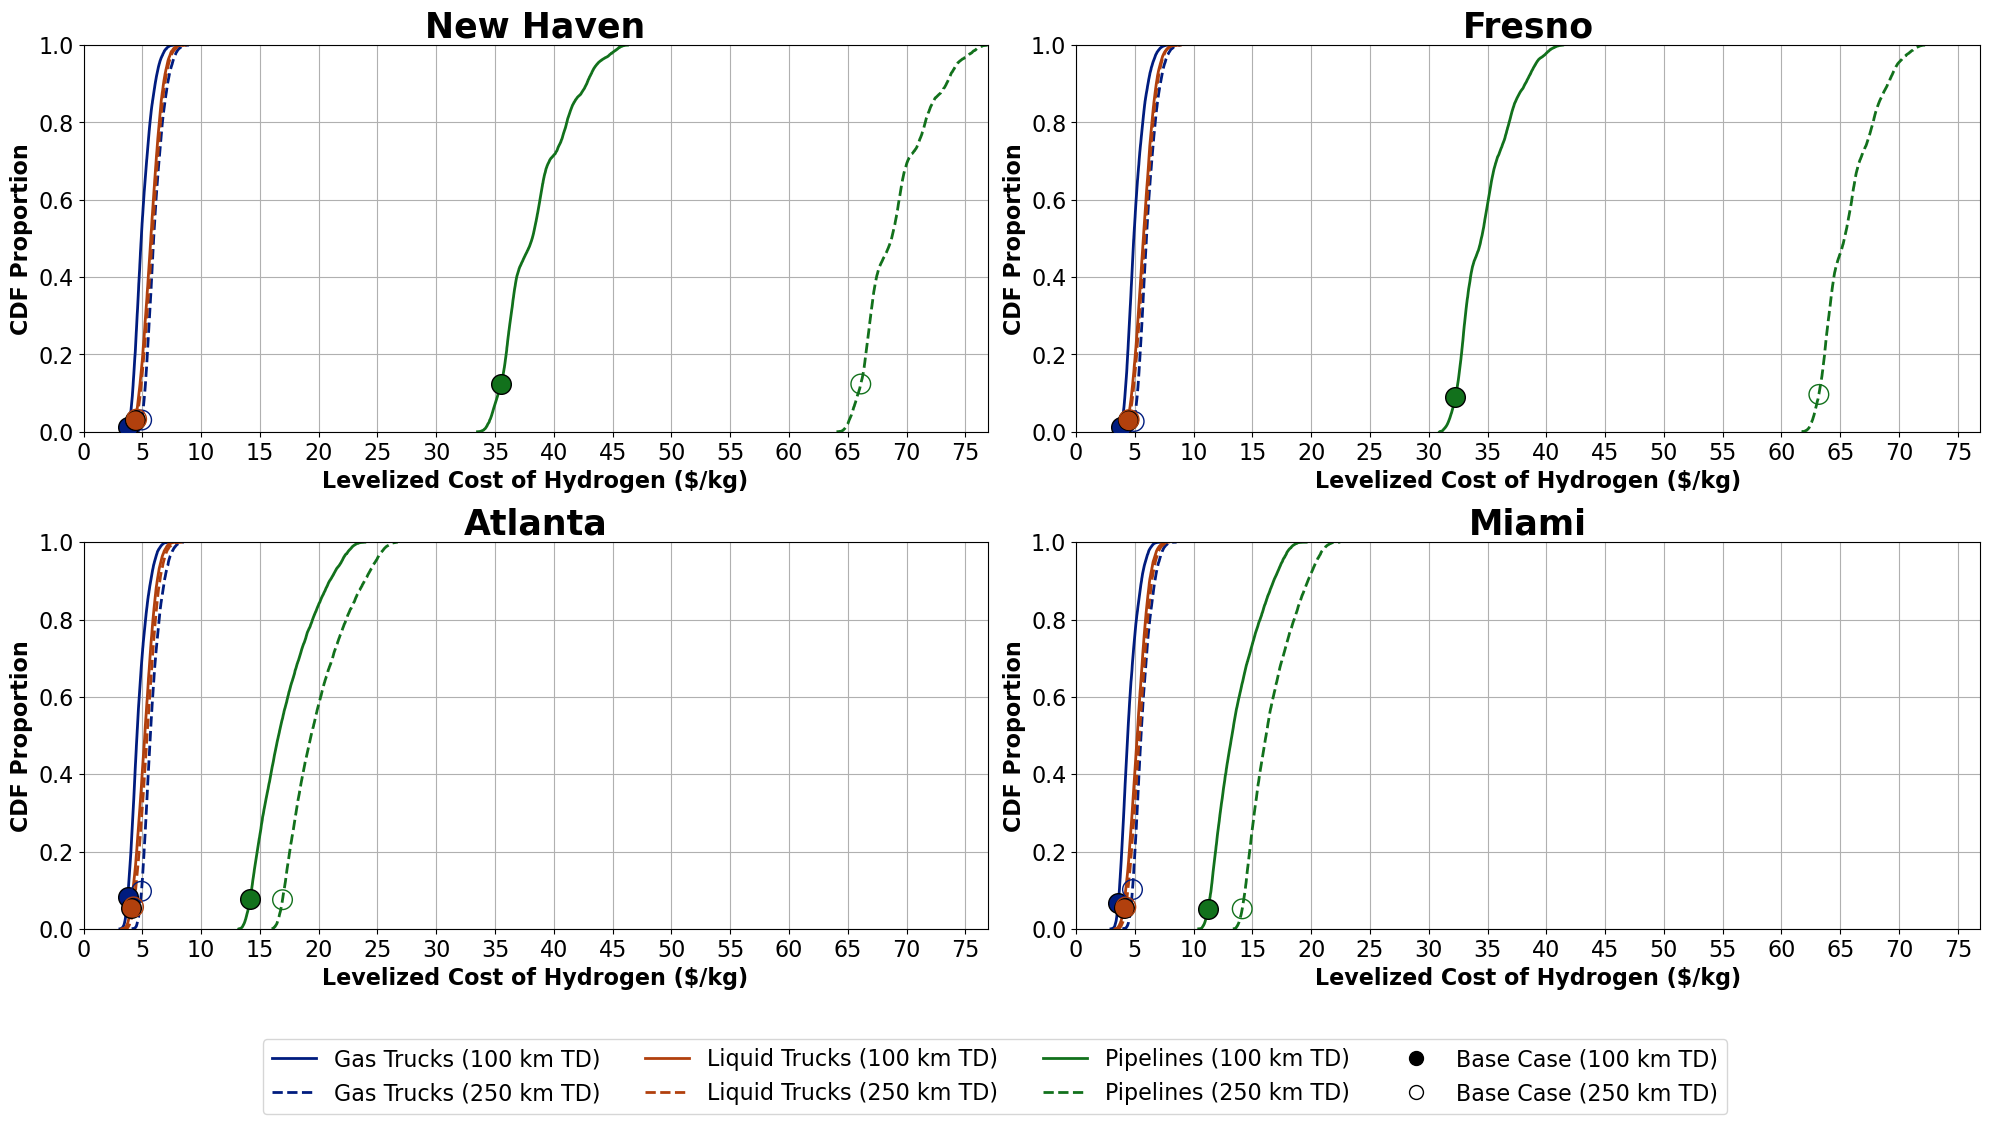

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Paths to your CSV files for 100 km and 250 km
csv_file_path_100 = 'Costs with Carbon Tax Data/Distribution Paper - Low Demand w_ CT 100.csv'
csv_file_path_250 = 'Costs with Carbon Tax Data/Distribution Paper - Low Demand w_ CT 250.csv'

# Reading the CSV files into DataFrames
df_100 = pd.read_csv(csv_file_path_100, skiprows=1)
df_250 = pd.read_csv(csv_file_path_250, skiprows=1)

# Dropping 'Unnamed' columns
df_100 = df_100.loc[:, ~df_100.columns.str.contains('^Unnamed')]
df_250 = df_250.loc[:, ~df_250.columns.str.contains('^Unnamed')]

# Assigning new column names
columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]
df_100.columns = columns
df_250.columns = columns

# Base case values for each city and method
base_case_values_100 = low_demand_values_100_km
base_case_values_250 = low_demand_values_250_km

# Define colors for each method
color_map = color_map

# Function to plot CDF and add base case star marker
def plot_cdf(data, ax, label, linestyle, color, base_case=None, base_case_label=None, star_filled=True):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF line
    ax.plot(sorted_data, cdf, linestyle=linestyle, color=color, linewidth=2, label=label)

    # Plot the star at the base case value if it's provided
    if base_case is not None:
        closest_index = np.abs(sorted_data - base_case).argmin()
        
        if star_filled:
            # Filled star for 100 km
            ax.scatter(
                sorted_data[closest_index], cdf[closest_index], color=color, 
                edgecolors='black', marker='o', s=200, zorder=5, label=base_case_label
            )
        else:
            # Hollow star for 250 km
            ax.scatter(
                sorted_data[closest_index], cdf[closest_index], facecolors='none', 
                edgecolors= color, marker='o', s=200, zorder=5, label=base_case_label
            )

    ax.set_ylim(0, 1)


# Plotting CDFs
# Create figure and subplots for each city
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 1 column, 4 rows for each city
# Correct flattening of axs if it’s a 2D array
axs = axs.flatten() if axs.ndim == 2 else axs

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Define x-limits based on the maximum value in both datasets
x_limits = (0, np.max(df_250['New Haven Pipelines']))
x_ticks = np.arange(0, np.max(df_250['New Haven Pipelines']), 5)

for i, city in enumerate(cities):
    for method in methods:
        column_name = f"{city} {method}"
        
        if column_name in df_100.columns and column_name in df_250.columns:
            base_case_100 = base_case_values_100.get(column_name, None)
            base_case_250 = base_case_values_250.get(column_name, None)
            
            color = color_map[method]

            # Plot CDF for 100 km (solid line)
            plot_cdf(
                df_100[column_name], axs[i], label=f'{method} (100 km)', linestyle='-', 
                color=color, base_case=base_case_100, base_case_label=None, 
                star_filled=True
            )
            
            # Plot CDF for 250 km (dashed line)
            plot_cdf(
                df_250[column_name], axs[i], label=f'{method} (250 km)', linestyle='--', 
                color=color, base_case=base_case_250, base_case_label=None, 
                star_filled=False
            )

    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
    axs[i].set_xticks(x_ticks)
    axs[i].set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)
    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('CDF Proportion', fontsize=16, fontweight='bold')
    axs[i].grid(True)

    # Use tick_params for tick size
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

# Create a single custom legend for the entire figure
custom_legend = [
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=2, linestyle='-', label="Gas Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=2, linestyle='--', label="Gas Trucks (250 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=2, linestyle='-', label="Liquid Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=2, linestyle='--', label="Liquid Trucks (250 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=2, linestyle='-', label="Pipelines (100 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=2, linestyle='--', label="Pipelines (250 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, linestyle='None', label="Base Case (100 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='none', linestyle='None', label="Base Case (250 km TD)")
]

fig.legend(
    handles=custom_legend, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.0000001),  # Adjust -0.2 as needed to move it further below
    ncol=4, 
    fontsize=16, 
    frameon=True
)


plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9)  # Adjust top to make room for legend
plt.savefig('Final Plots/Low_Demand_CDF_100_250_CT.png')
plt.show()


## Medium Demand

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = medium_demand_values

# Determine x-axis limits
x_limits = (np.min(df.min()), np.max(df.max()))

# Function to plot CDF and add base case star marker with matching line color
def plot_cdf(data, ax, label, color, base_case=None):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF line
    ax.plot(sorted_data, cdf, label=label, color=color)
    
    # Plot the star at the base case value if it's provided
    if base_case is not None:
        # Find the closest point on the CDF for the base case value
        closest_index = np.abs(sorted_data - base_case).argmin()
        # Use the same color as the line for the star
        ax.scatter(
            sorted_data[closest_index], cdf[closest_index],
            color=color, marker='*', edgecolors='black',
            s=200, zorder=5, label=f'{label} Base Case'
        )

    ax.set_ylim(0, 1)

# Plotting CDFs
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = {
    "Gas Trucks": "#1f77b4",    # Blue
    "Liquid Trucks": "#ff7f0e",  # Orange
    "Pipelines": "#2ca02c"       # Green
}

for i, city in enumerate(cities):
    for method, color in methods.items():
        column_name = f"{city} {method}"
        axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
        if column_name in df.columns:
            base_case = base_case_values.get(column_name, None)
            plot_cdf(df[column_name], axs[i], method, color=color, base_case=base_case)

    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('CDF Proportion', fontsize=16, fontweight='bold')
    axs[i].legend()
    axs[i].grid(True)

    # Use tick_params for tick size
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.savefig('Medium_Demand_CDF_w_CT')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ Carbon Tax.csv'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Dropping 'Unnamed' columns

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = medium_demand_values

# Settings
bin_width = 0.1  # Bin width for histograms
color_map = {"Gas Trucks":"#1f77b4", "Liquid Trucks": "#ff7f0e", "Pipelines": "#2ca02c"}  # Only Liquid Trucks and Pipelines
cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]  # Removed Gas Trucks from methods

# Define consistent x-axis limits and ticks
x_limits = (0, 31.958494)
x_ticks = np.arange(0, 36, 5)  # x-ticks from 0 to 35 in increments of 5

# Create figure and subplots for each city
fig, axs = plt.subplots(len(cities), 1, figsize=(15, 20))  # 1 column, 4 rows for each city

for i, city in enumerate(cities):
    ax = axs[i]
    ax.set_title(f'{city}', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 0.15)  # Set y-limits for histogram proportions
    ax.set_xlim(x_limits)  # Set consistent x-limits for each subplot

    # Set x-tick positions and labels explicitly for each subplot
    ax.set_xticks(x_ticks)  # Set x-tick positions
    ax.set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)  # Set x-tick labels
    ax.tick_params(axis='y', which='both', labelsize=16)  # Set label size for y-axis
    ax.tick_params(axis='x', which='both', length=5)  # Set tick length for x-axis

    # Create a secondary y-axis for boxplots without ticks on the right
    ax_box = ax.twinx()
    ax_box.set_ylim(-0.05, 0.05)  # Separate y-limits for boxplots above histograms
    ax_box.set_yticks([])  # Hide y-ticks for boxplot axis
    ax_box.set_xlim(x_limits)  # Ensure consistent x-limits on boxplot axis

    # Prepare a list to collect mean and std information for legend text
    method_stats = []

    # Plot each method (Liquid Trucks, Pipelines) for the current city
    for method in methods:
        column_name = f"{city} {method}"
        data = df[column_name].dropna().values  # Drop NaNs and extract values
        base_case = base_case_values.get(column_name)
        color = color_map[method]

        # Plot histogram for each method
        data_range = data.max() - data.min()
        num_bins = int(data_range / bin_width)
        ax.hist(data, bins=num_bins, color=color, alpha=0.6, 
                weights=np.ones_like(data) / len(data), edgecolor='black')
        
        # Overlay boxplot on secondary y-axis with smaller width
        ax_box.boxplot(data, vert=False, widths=0.01,  # Adjust boxplot width to be narrower
                       patch_artist=True, positions=[0.04],  # Position boxplot above histogram
                       boxprops=dict(facecolor=color, color=color, alpha=0.6),
                       medianprops=dict(color='red'), whiskerprops=dict(color=color),
                       capprops=dict(color=color), flierprops=dict(markeredgecolor=color))
        
        # Calculate mean and standard deviation, and format for display
        mean = data.mean()
        std_dev = data.std()
        method_stats.append(f"{method}: mean = {mean:.2f}, STD = {std_dev:.2f}")

        # Add base case as a vertical dashed line
        if base_case is not None:
            ax.axvline(x=base_case, color=color, linestyle='--', linewidth=2, alpha=0.7)

    # Display mean and std information in the lower-right corner of the plot
    ax.text(0.99, 0.5, "\n".join(method_stats), transform=ax.transAxes, fontsize=16,
            verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    # Set x-axis label for each subplot
    ax.set_title(f'{city}', fontsize=25, fontweight='bold')
    ax.set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=16, fontweight='bold')
    ax.grid(True)

# Manually add a custom legend for the entire figure
#custom_legend = [
#    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, label="Gas Trucks"),
#    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, label="Liquid Trucks"),
#    Line2D([0], [0], color=color_map["Pipelines"], lw=4, label="Pipelines"),
#    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Base Case (Dashed Line)')
#]
#fig.legend(handles=custom_legend, loc='upper center', ncol=3, fontsize=16, frameon=True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make room for legend
plt.savefig('Final Plots/Medium_Demand_Hist_Box_w_CC.png')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ Carbon Tax.csv'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

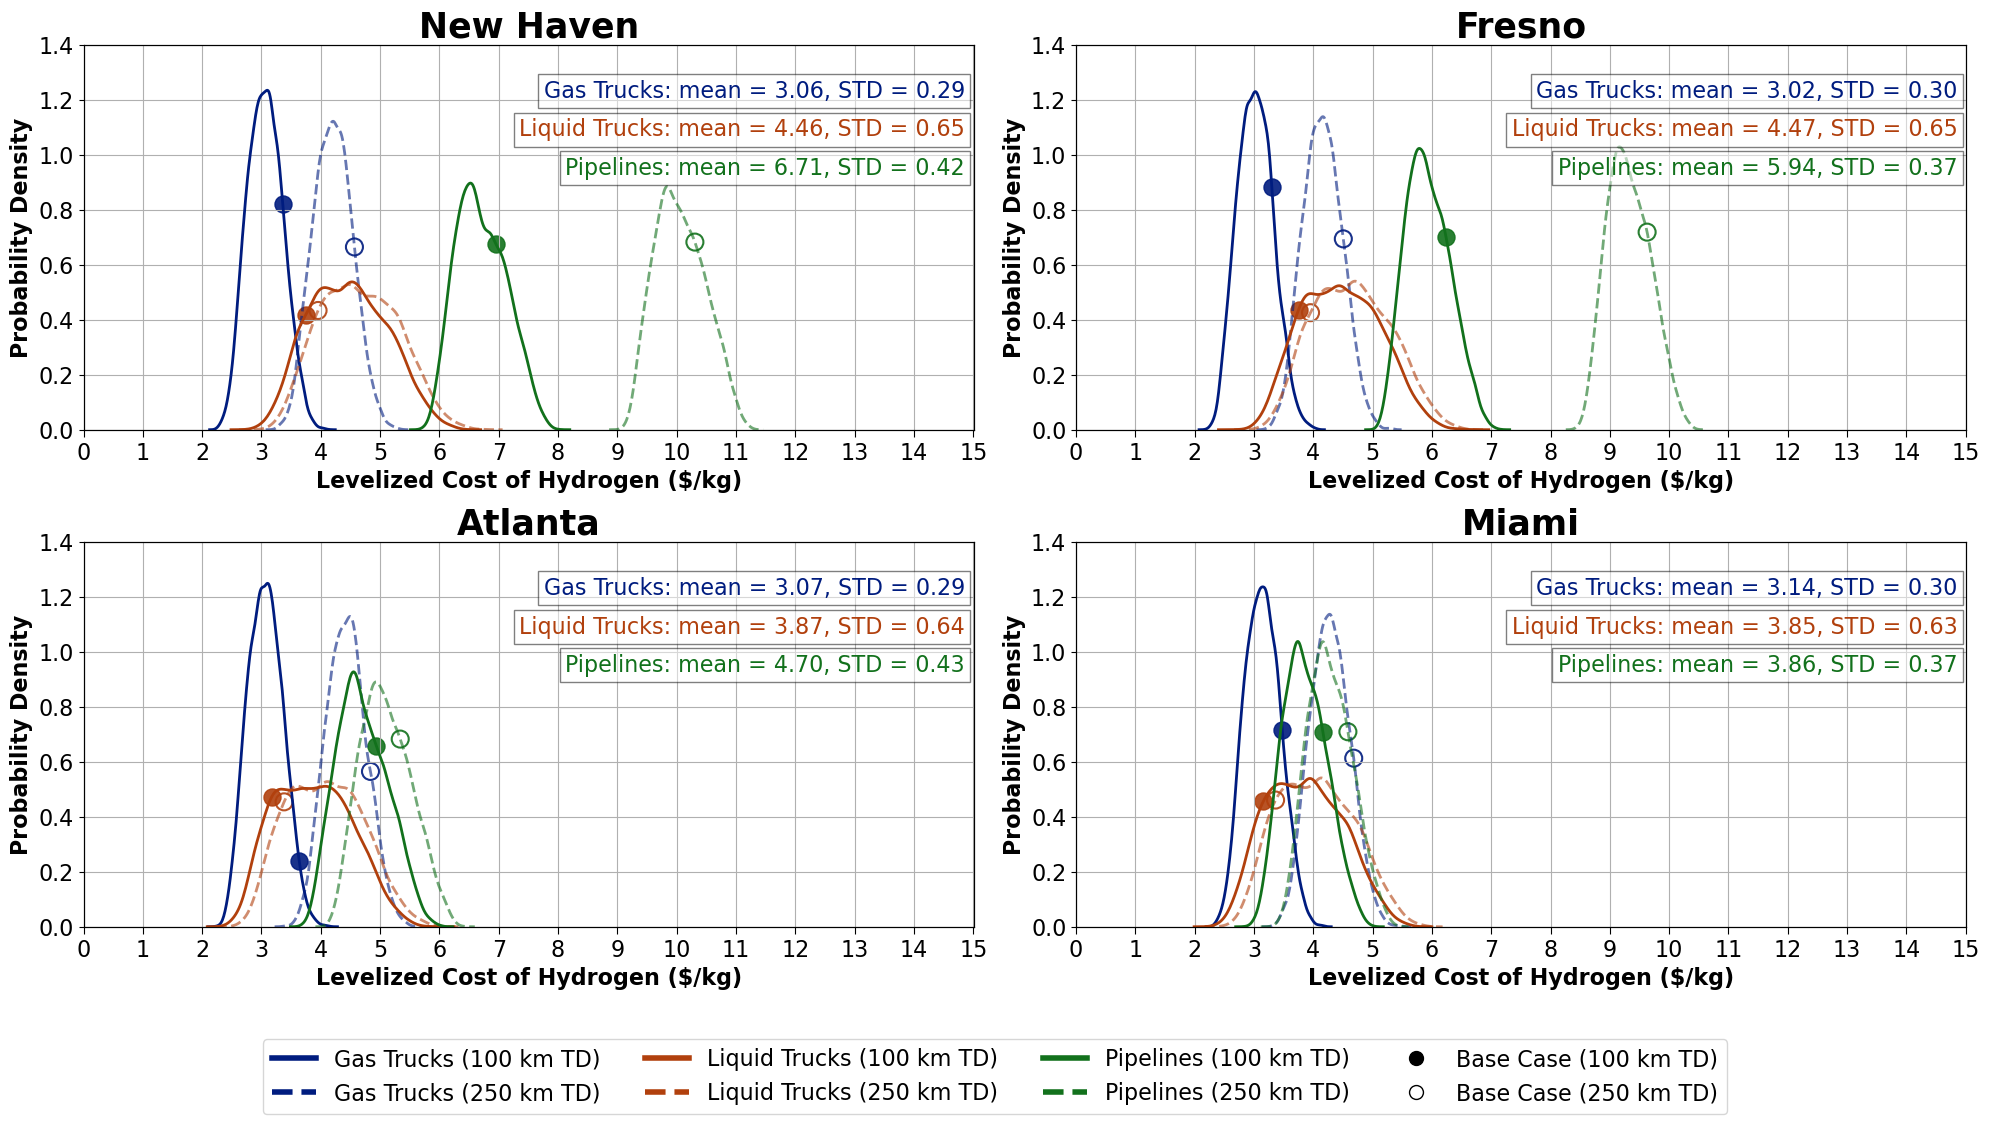

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

# Path to your CSV file
csv_file_path_100 = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ CT 100.csv'  # Replace with your actual file path
csv_file_path_250 = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ CT 250.csv'

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df_100 = pd.read_csv(csv_file_path_100, skiprows=1)
df_100 = df_100.loc[:, ~df_100.columns.str.contains('^Unnamed')]  # Dropping 'Unnamed' columns
df_250 = pd.read_csv(csv_file_path_250, skiprows=1)
df_250 = df_250.loc[:, ~df_250.columns.str.contains('^Unnamed')]

# Assigning new column names
df_100.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]
df_250.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values_100 = medium_demand_values_100_km
base_case_values_250 = medium_demand_values_250_km

import seaborn as sns

# Use the same color palette from the market penetration plot
palette = sns.color_palette("dark", n_colors=3)

color_map = {
    "Gas Trucks": palette[0],    # Dark blue (Gas Trucks)
    "Liquid Trucks": palette[1],  # Saturated orange (Liquid Trucks)
    "Pipelines": palette[2]       # Bold green (Pipelines)
}

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Define consistent x-axis limits and ticks
x_limits = (0, 15.01)
x_ticks = np.arange(0, 15.01, 1)

# Create figure and subplots for each city
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 1 column, 4 rows for each city
# Correct flattening of axs if it’s a 2D array
axs = axs.flatten() if axs.ndim == 2 else axs

for i, city in enumerate(cities):
    ax = axs[i]
    ax.set_title(f'{city}', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 1.4)  # Set y-limits for histogram proportions
    ax.set_xlim(x_limits)  # Set consistent x-limits for each subplot

    # Set x-tick positions and labels explicitly for each subplot
    ax.set_xticks(x_ticks)  # Set x-tick positions
    ax.set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)  # Set x-tick labels
    ax.tick_params(axis='y', which='both', labelsize=16)  # Set label size for y-axis
    ax.tick_params(axis='x', which='both', length=5)  # Set tick length for x-axis

    # Create a secondary y-axis for boxplots without ticks on the right
    ax_box = ax.twinx()
    ax_box.set_ylim(-0.05, 0.05)  # Separate y-limits for boxplots above histograms
    ax_box.set_yticks([])  # Hide y-ticks for boxplot axis
    ax_box.set_xlim(x_limits)  # Ensure consistent x-limits on boxplot axis

    # Prepare a list to collect mean and std information for legend text
    method_stats = []

    # Plot each method (Gas Trucks, Liquid Trucks, Pipelines) for the current city
    for method in methods:
        column_name = f"{city} {method}"
        
        data_100 = df_100[column_name].dropna().values
        base_case_100 = base_case_values_100.get(column_name)
        data_250 = df_250[column_name].dropna().values
        base_case_250 = base_case_values_250.get(column_name)
        
        color = color_map[method]

        # Plot KDE using seaborn
        sns.kdeplot(data_100, ax=ax, color=color, fill=False, alpha=1, linewidth=2)
        sns.kdeplot(data_250, ax=ax, color=color, linestyle = '--', fill=False, alpha=0.6, linewidth=2)

        # Generate the KDE function using scipy
        kde_100 = gaussian_kde(data_100)
        kde_250 = gaussian_kde(data_250)
    
        # Evaluate the KDE at the base case to get the y-value
        if base_case_100 is not None:
            y_value_100 = kde_100(base_case_100)[0]  # Get the density at the base case

            # Plot the base case as a dot on the KDE curve
            ax.scatter(base_case_100, y_value_100, color=color, s=150, linewidth=1, alpha=0.9)

        if base_case_250 is not None:
            y_value_250 = kde_250(base_case_250)[0]
            ax.scatter(base_case_250, y_value_250, color=color, s=150, marker='o', facecolors='none', edgecolor= color, linewidth=1.5, alpha=0.9)


        # Overlay boxplot on secondary y-axis
        #ax_box.boxplot(data_100, vert=False, widths=0.01,  
        #           patch_artist=True, positions=[0.04],  
        #           boxprops=dict(facecolor=color, color=color, alpha=0.6),
        #           medianprops=dict(color='red'), whiskerprops=dict(color=color),
        #           capprops=dict(color=color), flierprops=dict(markeredgecolor=color))

        # Display stats
        mean_100 = data_100.mean()
        std_dev_100 = data_100.std()
        method_stats.append(f"{method}: mean = {mean_100:.2f}, STD = {std_dev_100:.2f}")
  
    # Starting y-coordinate for the text
    starting_y = 0.85

    # Loop through methods and add colored text
    for i, (method, stats) in enumerate(zip(methods, method_stats)):
        ax.text(
            0.99, starting_y - i * 0.1, stats,  # Adjust vertical position dynamically
            transform=ax.transAxes, fontsize=16,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5),
            color=color_map[method]  # Set the text color dynamically
        )


    # Set x-axis label for each subplot
    ax.set_title(f'{city}', fontsize=25, fontweight='bold')
    ax.set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    ax.set_ylabel('Probability Density', fontsize=16, fontweight='bold')
    ax.grid(True)

# Manually add a custom legend for the entire figure
custom_legend = [
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, linestyle='-', label="Gas Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, linestyle='--', label="Gas Trucks (250 km TD)"),
    
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, linestyle='-', label="Liquid Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, linestyle='--', label="Liquid Trucks (250 km TD)"),
    
    Line2D([0], [0], color=color_map["Pipelines"], lw=4, linestyle='-', label="Pipelines (100 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=4, linestyle='--', label="Pipelines (250 km TD)"),
    
    Line2D([0], [0], color='black', marker='o', markersize=10, linestyle='None', label="Base Case (100 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='none', linestyle='None', label="Base Case (250 km TD)")
]

fig.legend(
    handles=custom_legend, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.0000001),  # Adjust -0.2 as needed to move it further below
    ncol=4, 
    fontsize=16, 
    frameon=True
)


plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9)  # Adjust top to make room for legend
plt.savefig('Final Plots/Medium_Demand_Hist_Box_w_CC_100-250.png')
plt.show()

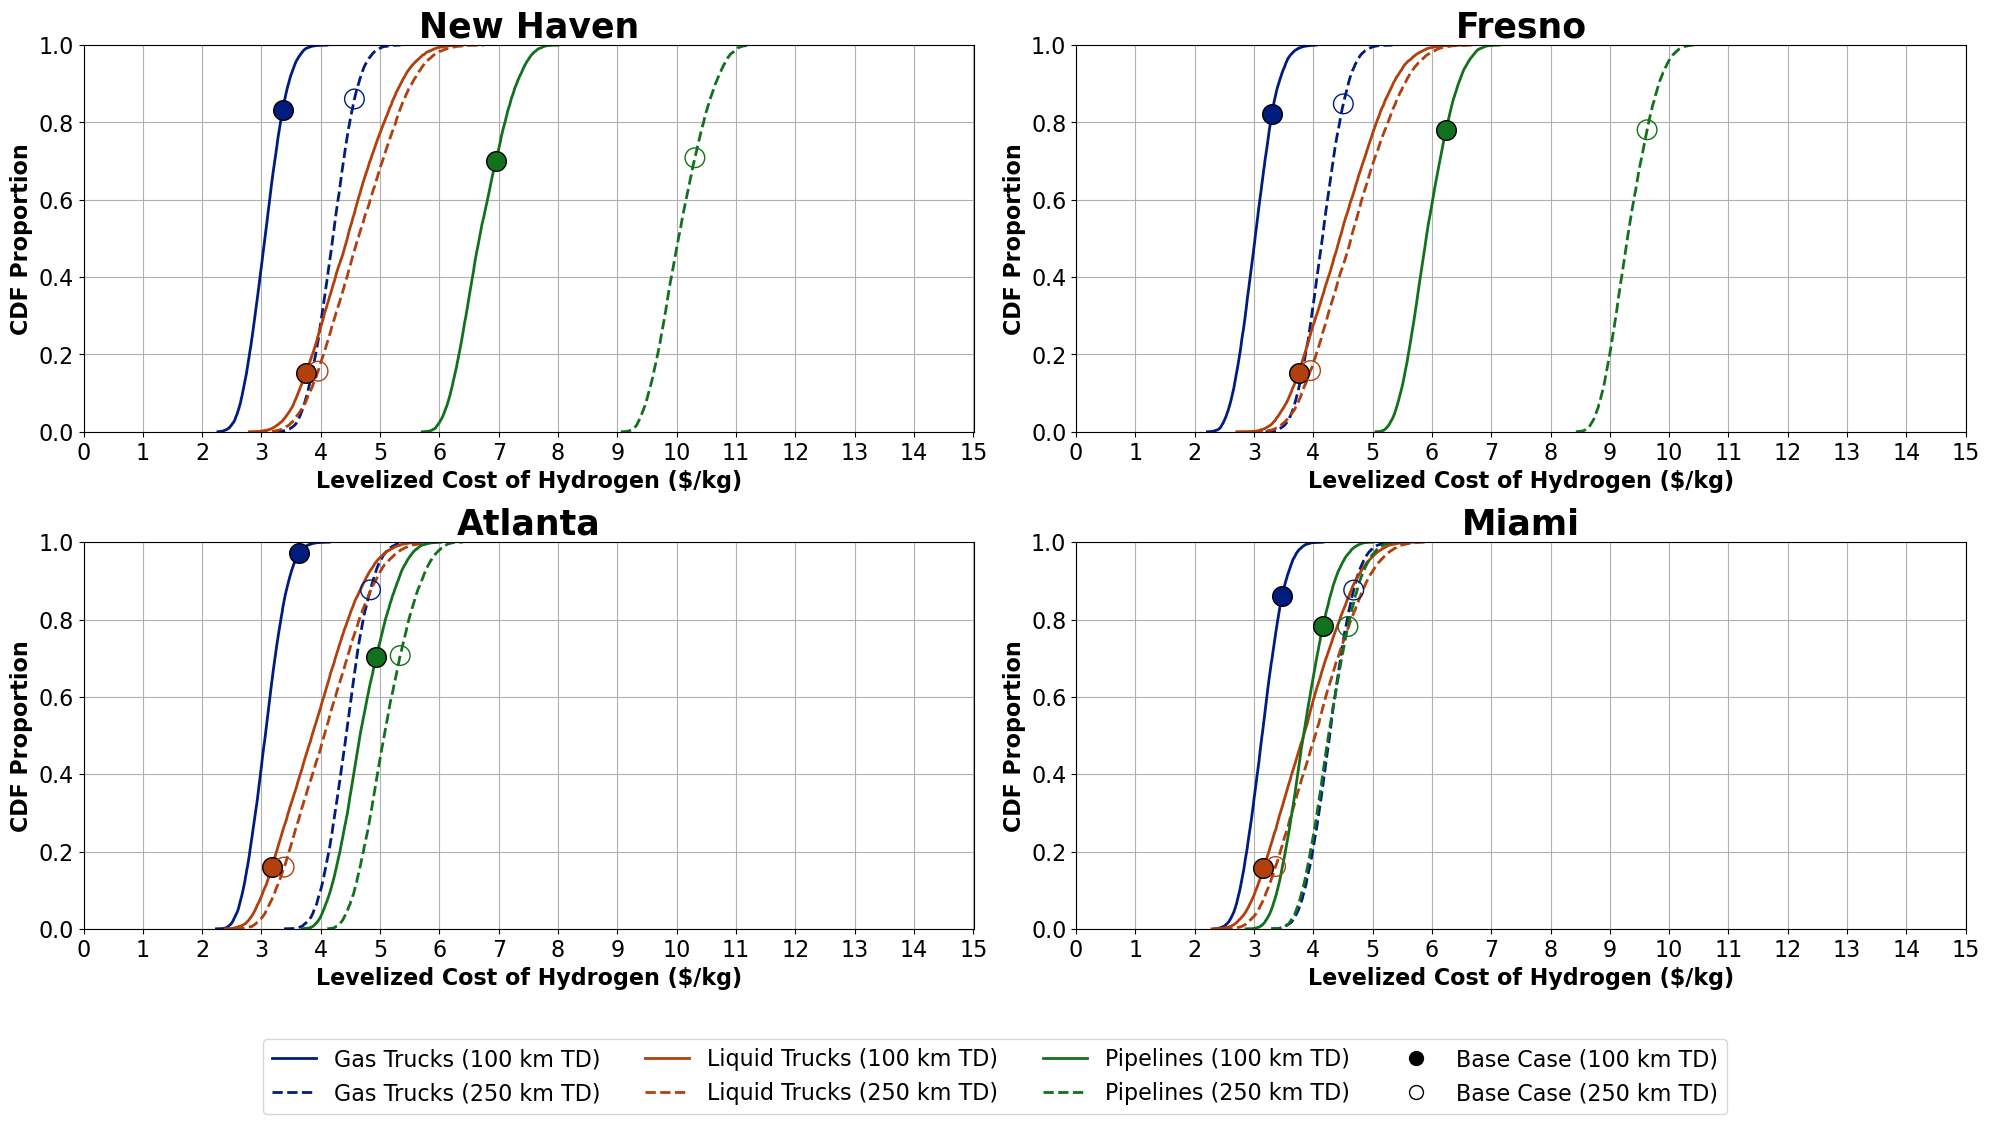

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Paths to your CSV files for 100 km and 250 km
csv_file_path_100 = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ CT 100.csv'
csv_file_path_250 = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ CT 250.csv'

# Reading the CSV files into DataFrames
df_100 = pd.read_csv(csv_file_path_100, skiprows=1)
df_250 = pd.read_csv(csv_file_path_250, skiprows=1)

# Dropping 'Unnamed' columns
df_100 = df_100.loc[:, ~df_100.columns.str.contains('^Unnamed')]
df_250 = df_250.loc[:, ~df_250.columns.str.contains('^Unnamed')]

# Assigning new column names
columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]
df_100.columns = columns
df_250.columns = columns

# Base case values for each city and method
base_case_values_100 = medium_demand_values_100_km
base_case_values_250 = medium_demand_values_250_km

# Define colors for each method
color_map = color_map

# Function to plot CDF and add base case star marker
def plot_cdf(data, ax, label, linestyle, color, base_case=None, base_case_label=None, star_filled=True):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF line
    ax.plot(sorted_data, cdf, linestyle=linestyle, color=color, linewidth=2, label=label)

    # Plot the star at the base case value if it's provided
    if base_case is not None:
        closest_index = np.abs(sorted_data - base_case).argmin()
        
        if star_filled:
            # Filled star for 100 km
            ax.scatter(
                sorted_data[closest_index], cdf[closest_index], color=color, 
                edgecolors='black', marker='o', s=200, zorder=5, label=base_case_label
            )
        else:
            # Hollow star for 250 km
            ax.scatter(
                sorted_data[closest_index], cdf[closest_index], facecolors='none', 
                edgecolors= color, marker='o', s=200, zorder=5, label=base_case_label
            )

    ax.set_ylim(0, 1)


# Plotting CDFs
# Create figure and subplots for each city
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 1 column, 4 rows for each city
# Correct flattening of axs if it’s a 2D array
axs = axs.flatten() if axs.ndim == 2 else axs

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Define x-limits based on the maximum value in both datasets
x_limits = (0, 15.01)
x_ticks = np.arange(0, 15.01, 1)

for i, city in enumerate(cities):
    for method in methods:
        column_name = f"{city} {method}"
        
        if column_name in df_100.columns and column_name in df_250.columns:
            base_case_100 = base_case_values_100.get(column_name, None)
            base_case_250 = base_case_values_250.get(column_name, None)
            
            color = color_map[method]

            # Plot CDF for 100 km (solid line)
            plot_cdf(
                df_100[column_name], axs[i], label=f'{method} (100 km)', linestyle='-', 
                color=color, base_case=base_case_100, base_case_label=None, 
                star_filled=True
            )
            
            # Plot CDF for 250 km (dashed line)
            plot_cdf(
                df_250[column_name], axs[i], label=f'{method} (250 km)', linestyle='--', 
                color=color, base_case=base_case_250, base_case_label=None, 
                star_filled=False
            )

    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
    axs[i].set_xticks(x_ticks)
    axs[i].set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)
    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('CDF Proportion', fontsize=16, fontweight='bold')
    axs[i].grid(True)

    # Use tick_params for tick size
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

# Create a single custom legend for the entire figure
custom_legend = [
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=2, linestyle='-', label="Gas Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=2, linestyle='--', label="Gas Trucks (250 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=2, linestyle='-', label="Liquid Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=2, linestyle='--', label="Liquid Trucks (250 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=2, linestyle='-', label="Pipelines (100 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=2, linestyle='--', label="Pipelines (250 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, linestyle='None', label="Base Case (100 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='none', linestyle='None', label="Base Case (250 km TD)")
]

fig.legend(
    handles=custom_legend, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.0000001),  # Adjust -0.2 as needed to move it further below
    ncol=4, 
    fontsize=16, 
    frameon=True
)


plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9)  # Adjust top to make room for legend
plt.savefig('Final Plots/Medium_Demand_CDF_100_250_CT.png')
plt.show()


## High Demand

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Dropping 'Unnamed' columns

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = high_demand_values

# Settings
bin_width = 0.1  # Bin width for histograms
color_map = {"Gas Trucks":"#1f77b4","Liquid Trucks": "#ff7f0e", "Pipelines": "#2ca02c"}  # Only Liquid Trucks and Pipelines
cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]  # Removed Gas Trucks from methods

# Define consistent x-axis limits and ticks
x_limits = (0, 31.958494)
x_ticks = np.arange(0, 36, 5)  # x-ticks from 0 to 35 in increments of 5

# Create figure and subplots for each city
fig, axs = plt.subplots(len(cities), 1, figsize=(15, 20))  # 1 column, 4 rows for each city

for i, city in enumerate(cities):
    ax = axs[i]
    ax.set_title(f'{city}', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 0.15)  # Set y-limits for histogram proportions
    ax.set_xlim(x_limits)  # Set consistent x-limits for each subplot

    # Set x-tick positions and labels explicitly for each subplot
    ax.set_xticks(x_ticks)  # Set x-tick positions
    ax.set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)  # Set x-tick labels
    ax.tick_params(axis='x', which='both', length=5)  # Set tick length for x-axis

    # Create a secondary y-axis for boxplots without ticks on the right
    ax_box = ax.twinx()
    ax_box.set_ylim(-0.05, 0.05)  # Separate y-limits for boxplots above histograms
    ax_box.set_yticks([])  # Hide y-ticks for boxplot axis
    ax.tick_params(axis='y', which='both', labelsize=16)  # Set label size for y-axis
    ax_box.set_xlim(x_limits)  # Ensure consistent x-limits on boxplot axis

    # Prepare a list to collect mean and std information for legend text
    method_stats = []

    # Plot each method (Liquid Trucks, Pipelines) for the current city
    for method in methods:
        column_name = f"{city} {method}"
        data = df[column_name].dropna().values  # Drop NaNs and extract values
        base_case = base_case_values.get(column_name)
        color = color_map[method]

        # Plot histogram for each method
        data_range = data.max() - data.min()
        num_bins = int(data_range / bin_width)
        ax.hist(data, bins=num_bins, color=color, alpha=0.6, 
                weights=np.ones_like(data) / len(data), edgecolor='black')
        
        # Overlay boxplot on secondary y-axis with smaller width
        ax_box.boxplot(data, vert=False, widths=0.01,  # Adjust boxplot width to be narrower
                       patch_artist=True, positions=[0.04],  # Position boxplot above histogram
                       boxprops=dict(facecolor=color, color=color, alpha=0.6),
                       medianprops=dict(color='red'), whiskerprops=dict(color=color),
                       capprops=dict(color=color), flierprops=dict(markeredgecolor=color))
        
        # Calculate mean and standard deviation, and format for display
        mean = data.mean()
        std_dev = data.std()
        method_stats.append(f"{method}: mean = {mean:.2f}, STD = {std_dev:.2f}")

        # Add base case as a vertical dashed line
        if base_case is not None:
            ax.axvline(x=base_case, color=color, linestyle='--', linewidth=2, alpha=0.7)

    # Display mean and std information in the lower-right corner of the plot
    ax.text(0.99, 0.5, "\n".join(method_stats), transform=ax.transAxes, fontsize=16,
            verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    # Set x-axis label for each subplot
    ax.set_title(f'{city}', fontsize=25, fontweight='bold')
    ax.set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=16, fontweight='bold')
    ax.grid(True)

# Manually add a custom legend for the entire figure
#custom_legend = [
#    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, label="Gas Trucks"),
#    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, label="Liquid Trucks"),
#    Line2D([0], [0], color=color_map["Pipelines"], lw=4, label="Pipelines"),
#    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Base Case (Dashed Line)')
#]
#fig.legend(handles=custom_legend, loc='upper center', ncol=3, fontsize=16, frameon=True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make room for legend
plt.savefig('Final Plots/High_Demand_Hist_Box_w_CC.png')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ Carbon Tax.csv'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = high_demand_values

# Determine x-axis limits
x_limits = (np.min(df.min()), np.max(df.max()))

# Function to plot CDF and add base case star marker with matching line color
def plot_cdf(data, ax, label, color, base_case=None):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF line
    ax.plot(sorted_data, cdf, label=label, color=color)
    
    # Plot the star at the base case value if it's provided
    if base_case is not None:
        # Find the closest point on the CDF for the base case value
        closest_index = np.abs(sorted_data - base_case).argmin()
        # Use the same color as the line for the star
        ax.scatter(
            sorted_data[closest_index], cdf[closest_index],
            color=color, marker='*', edgecolors='black',
            s=200, zorder=5, label=f'{label} Base Case'
        )

    ax.set_ylim(0, 1)

# Plotting CDFs
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = {
    "Gas Trucks": "#1f77b4",    # Blue
    "Liquid Trucks": "#ff7f0e",  # Orange
    "Pipelines": "#2ca02c"       # Green
}

for i, city in enumerate(cities):
    for method, color in methods.items():
        column_name = f"{city} {method}"
        axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
        if column_name in df.columns:
            base_case = base_case_values.get(column_name, None)
            plot_cdf(df[column_name], axs[i], method, color=color, base_case=base_case)

    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('CDF Proportion', fontsize=16, fontweight='bold')
    axs[i].legend()
    axs[i].grid(True)

    # Use tick_params for tick size
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.savefig('High_Demand_CDF_w_CT')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ Carbon Tax.csv'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

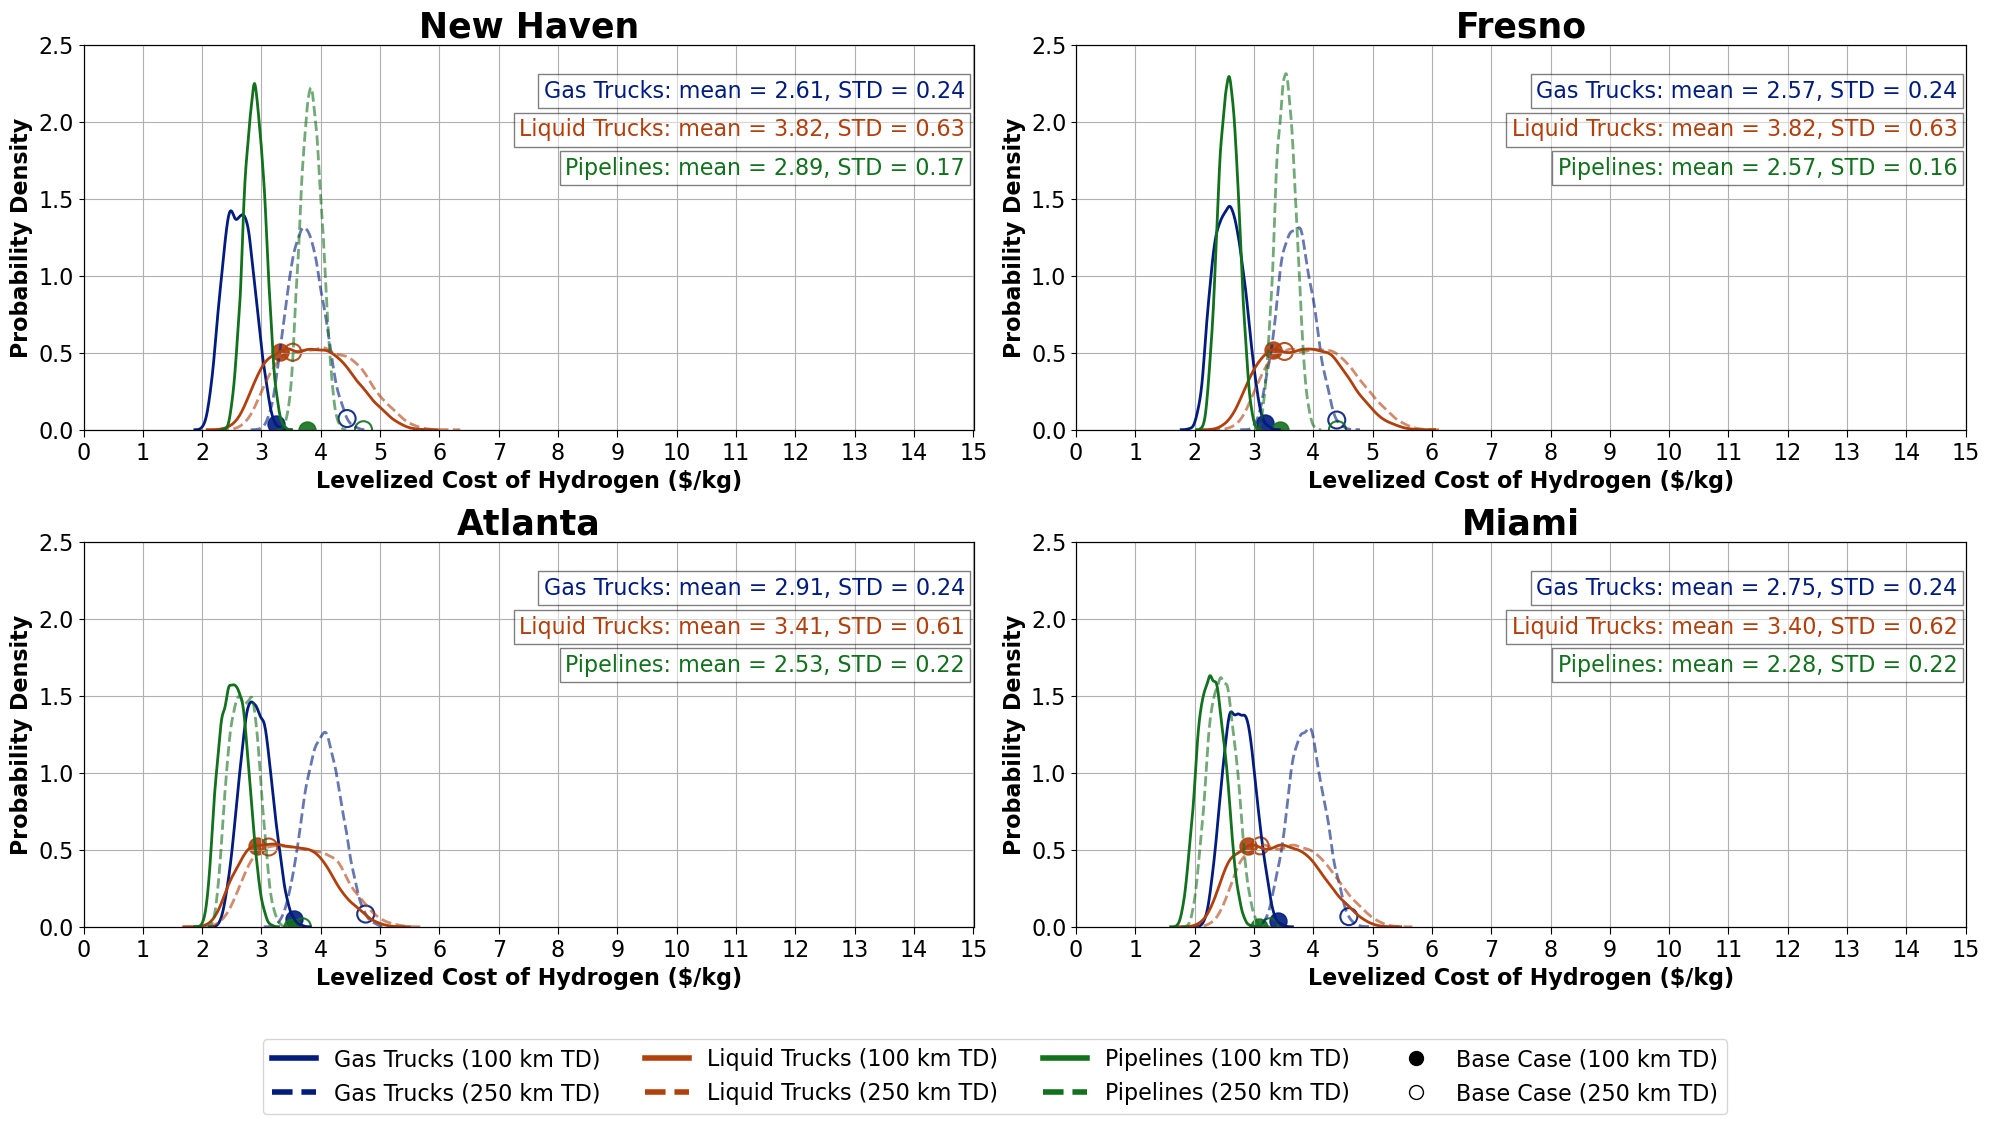

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

# Path to your CSV file
csv_file_path_100 = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ CT 100.csv'  # Replace with your actual file path
csv_file_path_250 = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ CT 250.csv'

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df_100 = pd.read_csv(csv_file_path_100, skiprows=1)
df_100 = df_100.loc[:, ~df_100.columns.str.contains('^Unnamed')]  # Dropping 'Unnamed' columns
df_250 = pd.read_csv(csv_file_path_250, skiprows=1)
df_250 = df_250.loc[:, ~df_250.columns.str.contains('^Unnamed')]

# Assigning new column names
df_100.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]
df_250.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values_100 = high_demand_values_100_km
base_case_values_250 = high_demand_values_250_km

import seaborn as sns

# Use the same color palette from the market penetration plot
palette = sns.color_palette("dark", n_colors=3)

color_map = {
    "Gas Trucks": palette[0],    # Dark blue (Gas Trucks)
    "Liquid Trucks": palette[1],  # Saturated orange (Liquid Trucks)
    "Pipelines": palette[2]       # Bold green (Pipelines)
}

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Define consistent x-axis limits and ticks
x_limits = (0, 15.01)
x_ticks = np.arange(0, 15.01, 1)

# Create figure and subplots for each city
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 1 column, 4 rows for each city
# Correct flattening of axs if it’s a 2D array
axs = axs.flatten() if axs.ndim == 2 else axs

for i, city in enumerate(cities):
    ax = axs[i]
    ax.set_title(f'{city}', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 2.5)  # Set y-limits for histogram proportions
    ax.set_xlim(x_limits)  # Set consistent x-limits for each subplot

    # Set x-tick positions and labels explicitly for each subplot
    ax.set_xticks(x_ticks)  # Set x-tick positions
    ax.set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)  # Set x-tick labels
    ax.tick_params(axis='y', which='both', labelsize=16)  # Set label size for y-axis
    ax.tick_params(axis='x', which='both', length=5)  # Set tick length for x-axis

    # Create a secondary y-axis for boxplots without ticks on the right
    ax_box = ax.twinx()
    ax_box.set_ylim(-0.05, 0.05)  # Separate y-limits for boxplots above histograms
    ax_box.set_yticks([])  # Hide y-ticks for boxplot axis
    ax_box.set_xlim(x_limits)  # Ensure consistent x-limits on boxplot axis

    # Prepare a list to collect mean and std information for legend text
    method_stats = []

    # Plot each method (Gas Trucks, Liquid Trucks, Pipelines) for the current city
    for method in methods:
        column_name = f"{city} {method}"
        
        data_100 = df_100[column_name].dropna().values
        base_case_100 = base_case_values_100.get(column_name)
        data_250 = df_250[column_name].dropna().values
        base_case_250 = base_case_values_250.get(column_name)
        
        color = color_map[method]

        # Plot KDE using seaborn
        sns.kdeplot(data_100, ax=ax, color=color, fill=False, alpha=1, linewidth=2)
        sns.kdeplot(data_250, ax=ax, color=color, linestyle = '--', fill=False, alpha=0.6, linewidth=2)

        # Generate the KDE function using scipy
        kde_100 = gaussian_kde(data_100)
        kde_250 = gaussian_kde(data_250)
    
        # Evaluate the KDE at the base case to get the y-value
        if base_case_100 is not None:
            y_value_100 = kde_100(base_case_100)[0]  # Get the density at the base case

            # Plot the base case as a dot on the KDE curve
            ax.scatter(base_case_100, y_value_100, color=color, s=150, linewidth=1, alpha=0.9)

        if base_case_250 is not None:
            y_value_250 = kde_250(base_case_250)[0]
            ax.scatter(base_case_250, y_value_250, color=color, s=150, marker='o', facecolors='none', edgecolor= color, linewidth=1.5, alpha=0.9)


        # Overlay boxplot on secondary y-axis
        #ax_box.boxplot(data_100, vert=False, widths=0.01,  
        #           patch_artist=True, positions=[0.04],  
        #           boxprops=dict(facecolor=color, color=color, alpha=0.6),
        #           medianprops=dict(color='red'), whiskerprops=dict(color=color),
        #           capprops=dict(color=color), flierprops=dict(markeredgecolor=color))

        # Display stats
        mean_100 = data_100.mean()
        std_dev_100 = data_100.std()
        method_stats.append(f"{method}: mean = {mean_100:.2f}, STD = {std_dev_100:.2f}")
  
    # Starting y-coordinate for the text
    starting_y = 0.85

    # Loop through methods and add colored text
    for i, (method, stats) in enumerate(zip(methods, method_stats)):
        ax.text(
            0.99, starting_y - i * 0.1, stats,  # Adjust vertical position dynamically
            transform=ax.transAxes, fontsize=16,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5),
            color=color_map[method]  # Set the text color dynamically
        )


    # Set x-axis label for each subplot
    ax.set_title(f'{city}', fontsize=25, fontweight='bold')
    ax.set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    ax.set_ylabel('Probability Density', fontsize=16, fontweight='bold')
    ax.grid(True)

# Manually add a custom legend for the entire figure
custom_legend = [
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, linestyle='-', label="Gas Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, linestyle='--', label="Gas Trucks (250 km TD)"),
    
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, linestyle='-', label="Liquid Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, linestyle='--', label="Liquid Trucks (250 km TD)"),
    
    Line2D([0], [0], color=color_map["Pipelines"], lw=4, linestyle='-', label="Pipelines (100 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=4, linestyle='--', label="Pipelines (250 km TD)"),
    
    Line2D([0], [0], color='black', marker='o', markersize=10, linestyle='None', label="Base Case (100 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='none', linestyle='None', label="Base Case (250 km TD)")
]

fig.legend(
    handles=custom_legend, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.0000001),  # Adjust -0.2 as needed to move it further below
    ncol=4, 
    fontsize=16, 
    frameon=True
)


plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9)  # Adjust top to make room for legend
plt.savefig('Final Plots/High_Demand_Hist_Box_w_CC_100-250.png')
plt.show()

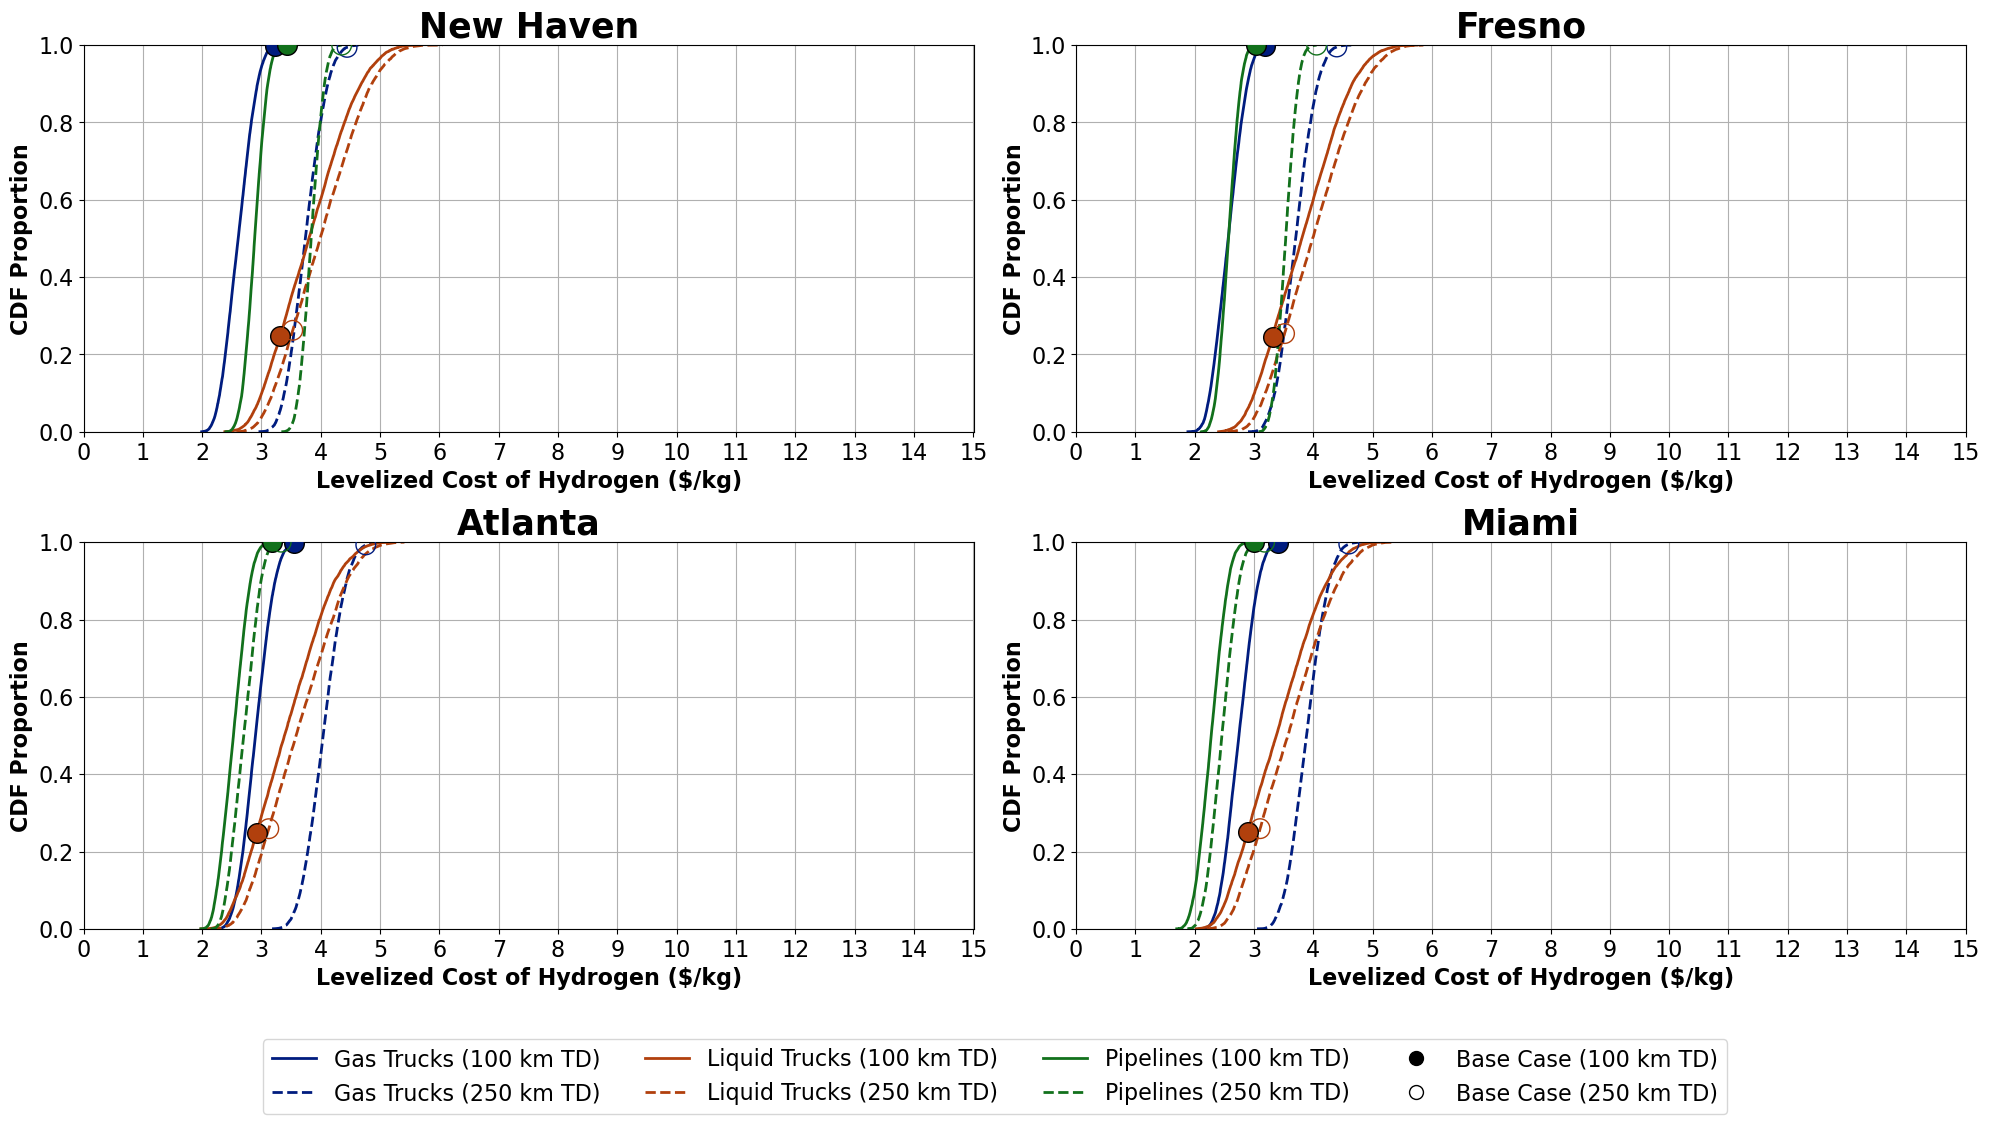

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Paths to your CSV files for 100 km and 250 km
csv_file_path_100 = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ CT 100.csv'
csv_file_path_250 = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ CT 250.csv'

# Reading the CSV files into DataFrames
df_100 = pd.read_csv(csv_file_path_100, skiprows=1)
df_250 = pd.read_csv(csv_file_path_250, skiprows=1)

# Dropping 'Unnamed' columns
df_100 = df_100.loc[:, ~df_100.columns.str.contains('^Unnamed')]
df_250 = df_250.loc[:, ~df_250.columns.str.contains('^Unnamed')]

# Assigning new column names
columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]
df_100.columns = columns
df_250.columns = columns

# Base case values for each city and method
base_case_values_100 = high_demand_values_100_km
base_case_values_250 = high_demand_values_250_km

# Define colors for each method
color_map = color_map

# Function to plot CDF and add base case star marker
def plot_cdf(data, ax, label, linestyle, color, base_case=None, base_case_label=None, star_filled=True):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF line
    ax.plot(sorted_data, cdf, linestyle=linestyle, color=color, linewidth=2, label=label)

    # Plot the star at the base case value if it's provided
    if base_case is not None:
        closest_index = np.abs(sorted_data - base_case).argmin()
        
        if star_filled:
            # Filled star for 100 km
            ax.scatter(
                sorted_data[closest_index], cdf[closest_index], color=color, 
                edgecolors='black', marker='o', s=200, zorder=5, label=base_case_label
            )
        else:
            # Hollow star for 250 km
            ax.scatter(
                sorted_data[closest_index], cdf[closest_index], facecolors='none', 
                edgecolors= color, marker='o', s=200, zorder=5, label=base_case_label
            )

    ax.set_ylim(0, 1)


# Plotting CDFs
# Create figure and subplots for each city
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 1 column, 4 rows for each city
# Correct flattening of axs if it’s a 2D array
axs = axs.flatten() if axs.ndim == 2 else axs

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Define x-limits based on the maximum value in both datasets
x_limits = (0, 15.01)
x_ticks = np.arange(0, 15.01, 1)

for i, city in enumerate(cities):
    for method in methods:
        column_name = f"{city} {method}"
        
        if column_name in df_100.columns and column_name in df_250.columns:
            base_case_100 = base_case_values_100.get(column_name, None)
            base_case_250 = base_case_values_250.get(column_name, None)
            
            color = color_map[method]

            # Plot CDF for 100 km (solid line)
            plot_cdf(
                df_100[column_name], axs[i], label=f'{method} (100 km)', linestyle='-', 
                color=color, base_case=base_case_100, base_case_label=None, 
                star_filled=True
            )
            
            # Plot CDF for 250 km (dashed line)
            plot_cdf(
                df_250[column_name], axs[i], label=f'{method} (250 km)', linestyle='--', 
                color=color, base_case=base_case_250, base_case_label=None, 
                star_filled=False
            )

    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
    axs[i].set_xticks(x_ticks)
    axs[i].set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)
    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('CDF Proportion', fontsize=16, fontweight='bold')
    axs[i].grid(True)

    # Use tick_params for tick size
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

# Create a single custom legend for the entire figure
custom_legend = [
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=2, linestyle='-', label="Gas Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=2, linestyle='--', label="Gas Trucks (250 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=2, linestyle='-', label="Liquid Trucks (100 km TD)"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=2, linestyle='--', label="Liquid Trucks (250 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=2, linestyle='-', label="Pipelines (100 km TD)"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=2, linestyle='--', label="Pipelines (250 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, linestyle='None', label="Base Case (100 km TD)"),
    Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='none', linestyle='None', label="Base Case (250 km TD)")
]

fig.legend(
    handles=custom_legend, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.0000001),  # Adjust -0.2 as needed to move it further below
    ncol=4, 
    fontsize=16, 
    frameon=True
)


plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.subplots_adjust(top=0.9)  # Adjust top to make room for legend
plt.savefig('Final Plots/High_Demand_CDF_100_250_CT.png')
plt.show()
